In [96]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../datasets/orders.csv')

# Tratando os Dados

In [130]:
# Eliminar linhas com dados faltantes
df.dropna(inplace=True)
# Converter datas para DateTime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
# Criar coluna de dias até aprovação
df['dias_ate_aprovacao'] =  df['order_approved_at'] - df['order_purchase_timestamp']
df['dias'] = df['dias_ate_aprovacao'].apply(lambda x: x.days)
# Aprovação até transportadora
df['aprov_ate_transportadora'] = df['order_delivered_carrier_date'] - df['order_approved_at']
df['dias_ate_transp'] = df['aprov_ate_transportadora'].apply(lambda x: x.days)
# Transportadora até entrega
df['transp_ate_entrega'] = df['order_delivered_customer_date'] - df['order_delivered_carrier_date']
df['dias_ate_entrega'] = df['transp_ate_entrega'].apply(lambda x: x.days)
# Previsão de Entrega X Entrega real
df['dif_entrega_prevista'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['dif_dias_previsao'] = df['dif_entrega_prevista'].apply(lambda x: x.days)
# Coluna de anos de pedido
df['ano'] = df['order_approved_at'].apply(lambda x: x.year)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dias_ate_aprovacao,dias,aprov_ate_transportadora,dias_ate_transp,transp_ate_entrega,dias_ate_entrega,dif_entrega_prevista,dif_dias_previsao,ano
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,0,2 days 08:47:45,2,6 days 01:30:13,6,7 days 02:34:47,7,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,1,0 days 11:06:33,0,12 days 00:56:45,12,5 days 08:32:15,5,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0,0 days 04:54:37,0,9 days 04:16:29,9,17 days 05:53:31,17,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,0,3 days 17:54:00,3,9 days 10:48:43,9,12 days 23:31:18,12,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0,0 days 21:26:05,0,1 days 22:30:28,1,9 days 05:42:58,9,2018


# Calculando estatísticas

In [91]:
#Dataframe de estatísticas
stats = df.describe()
# Lista de colunas do dataframe
col_list = stats.columns.to_list()

In [92]:
# Desvio Padrão
stats.loc['std'] = df[col_list].std()

In [93]:
# Intervalo Interquartil ou Intervalo Interquartílico (IQR)(Interquartile Range)
iqr_list = []
for c in stats.columns:
    iqr = stats.loc['75%', c] - stats.loc['25%', c]
    iqr_list.append(iqr)

stats.loc['iqr'] = iqr_list


In [94]:
stats

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dias_ate_aprovacao,dias,aprov_ate_transportadora,dias_ate_transp,transp_ate_entrega,dias_ate_entrega,dif_entrega_prevista,dif_dias_previsao
count,96461,96461,96461,96461,96461,96461,96461.000000,96461,96461.000000,96461,96461.000000,96461,96461.000000
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,0 days 10:16:39.837893034,0.264345,2 days 19:10:58.028685168,2.295923,9 days 07:56:08.719275147,8.878396,11 days 04:16:01.007909932,10.875577
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0 days 00:00:00,0.000000,-172 days +18:44:38,-172.000000,-17 days +21:41:31,-17.000000,-189 days +00:35:53,-189.000000
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,0 days 00:12:55,0.000000,0 days 20:59:05,0.000000,4 days 02:23:26,4.000000,6 days 09:20:35,6.000000
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,0 days 00:20:36,0.000000,1 days 19:34:50,1.000000,7 days 02:23:34,7.000000,11 days 22:41:24,11.000000
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,0 days 14:31:05,0.000000,3 days 13:48:18,3.000000,12 days 00:42:14,12.000000,16 days 05:51:07,16.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,30 days 21:26:37,30.000000,125 days 18:18:06,125.000000,205 days 04:35:00,205.000000,146 days 00:23:13,146.000000
std,152 days 19:54:03.659502606,152 days 20:09:06.204151638,152 days 13:33:39.945655264,152 days 04:43:23.650356060,151 days 02:35:43.775473620,0 days 20:32:08.144063780,0.729936,3 days 12:54:06.348358820,3.548444,8 days 18:15:24.626362231,8.746673,10 days 04:27:25.366427548,10.183476
iqr,233 days 09:04:56,233 days 20:00:35,231 days 21:40:41,232 days 00:36:55,235 days 00:00:00,0 days 14:18:10,0.000000,2 days 16:49:13,3.000000,7 days 22:18:48,8.000000,9 days 20:30:32,10.000000


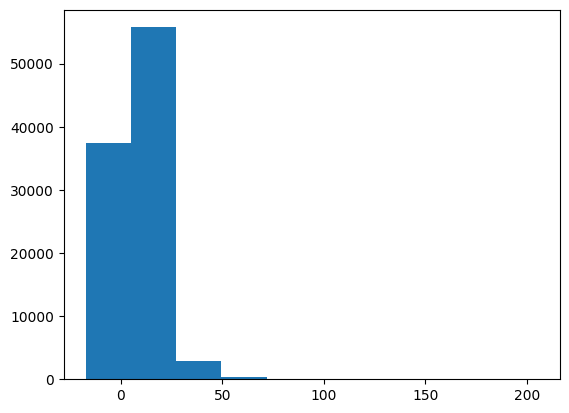

In [101]:
plt.hist(df['dias_ate_entrega'])
plt.show()

(array([1.2000e+01, 1.3000e+01, 2.3000e+01, 5.1000e+01, 6.9600e+02,
        4.7647e+04, 4.7817e+04, 1.9500e+02, 3.0000e+00, 4.0000e+00]),
 array([-189. , -155.5, -122. ,  -88.5,  -55. ,  -21.5,   12. ,   45.5,
          79. ,  112.5,  146. ]),
 <BarContainer object of 10 artists>)

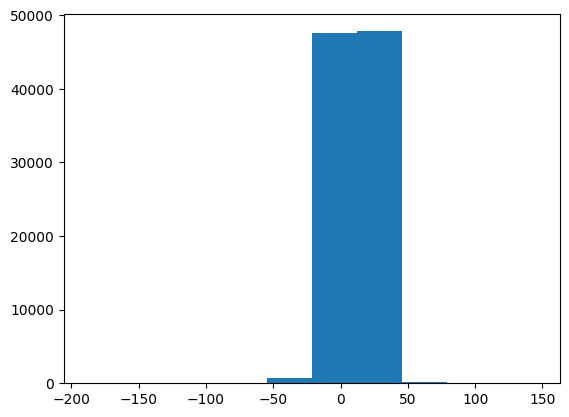

In [103]:
plt.hist(df['dif_dias_previsao'])

In [140]:
delivered , canceled = order_status = df['order_status'].value_counts()
order_status

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

In [141]:
order_status = order_status.to_list()

([<matplotlib.patches.Wedge at 0x13f6f4d51f0>,
 [Text(-1.0999999789969634, 0.0002149573919234968, 'Delivered'),
  Text(1.0999999790157513, -0.00021486122686732804, 'Canceled')])

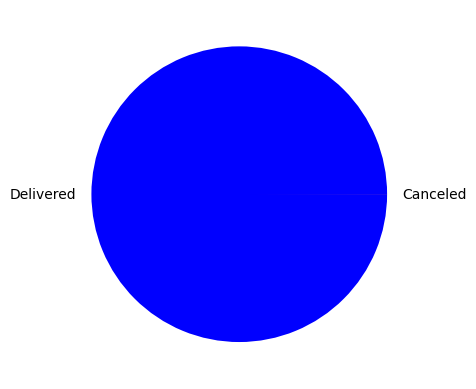

In [129]:
plt.pie(order_status, colors=['blue', 'red'], labels=['Delivered', 'Canceled'])

In [116]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x: 'ArrayLike', explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, *, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
    Plot a pie chart.

    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.

    The wedges are plotted counterclockwise, by default starting from the
    x-axis.

    Parameters
    ---

In [144]:
pedidos_por_ano = df['ano'].value_counts()
anos = pedidos_por_ano.index.to_list()

([<matplotlib.patches.Wedge at 0x13f6df6f830>,
 [Text(-0.16434047672695004, 1.0876544523464973, '2018'),
  Text(0.15469906605746336, -1.089067582366195, '2017'),
  Text(1.0999568400627127, -0.009744229022971975, '2016')])

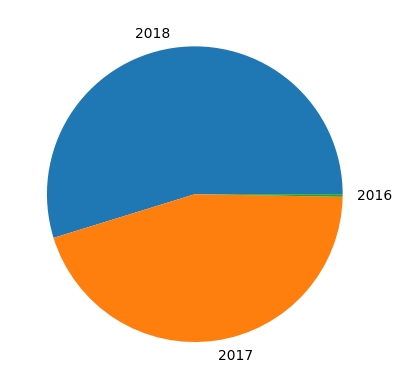

In [135]:
plt.pie(pedidos_por_ano, labels=['2018', '2017', '2016'])

<BarContainer object of 3 artists>

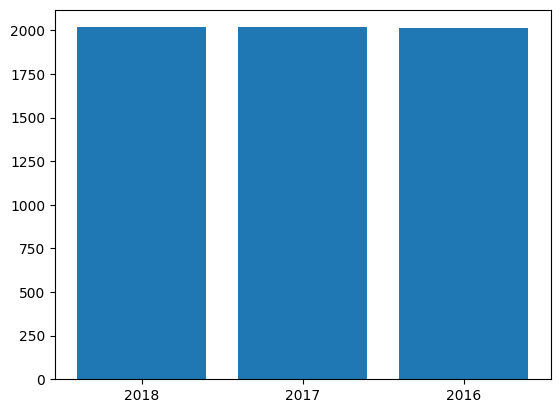

In [145]:
plt.bar(['2018', '2017', '2016'], anos)